In [493]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt


## Importing data


In [516]:
required_df = pd.read_csv("/Users/jxxt/verzeo/tmdb-movies .csv")

## Data Wrangling

In [517]:
required_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [518]:
required_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [519]:
print(required_df.shape)
print(required_df.duplicated().sum())
print("Display Duplicate Row :")
for i,v in required_df.duplicated().iteritems():
    if (v):
        print (required_df.loc[i])
required_df.isnull().sum()

(10866, 21)
1
Display Duplicate Row :
id                                                                  42194
imdb_id                                                         tt0411951
popularity                                                        0.59643
budget                                                           30000000
revenue                                                            967000
original_title                                                     TEKKEN
cast                    Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...
homepage                                                              NaN
director                                                 Dwight H. Little
tagline                                               Survival is no game
keywords                martial arts|dystopia|based on video game|mart...
overview                In the year of 2039, after World Wars destroy ...
runtime                                                                92


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [520]:
required_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<p><b>NOTE:</b> Min values for buget, revenue and runtime are null.</p>

In [521]:
required_df['genres'] = required_df['genres'].str.split("|",expand=True)
required_df['genres'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

In [603]:
required_df['production_companies'] = required_df['production_companies'].str.split("|",expand=True)
required_df['production_companies'].value_counts()

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      214
                                         ... 
Tekli British Productions                   1
C.B. Films S.A.                             1
Serenade Films                              1
Ridley Scott Associates                     1
Namco                                       1
Name: production_companies, Length: 3057, dtype: int64

In [522]:
required_df['release_date'] = pd.to_datetime(required_df['release_date'])
required_df["release_date"].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [523]:
required_df.isna().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [524]:
required_df.fillna(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,0,Bruce Brown,0,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,0,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,0,Eldar Ryazanov,0,...,An insurance agent who moonlights as a carthie...,94,Mystery,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,0,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


###  Data Cleaning

In [525]:
required_df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'], axis=1, inplace=True)

In [526]:
required_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [527]:
required_df.drop_duplicates(inplace=True)
#check
required_df.duplicated().sum()

0

In [529]:
required_df.shape


(10865, 15)

In [533]:
print("Rows With Zero Values In  Budget Column:",required_df[(required_df['budget']==0)].shape[0])
print("Rows With Zero Values In Revenue Column:",required_df[(required_df['revenue']==0)].shape[0])
print("Rows With Zero Values In Runtime Column:",required_df[(required_df['runtime']==0)].shape[0])

Rows With Zero Values In  Budget Column: 5696
Rows With Zero Values In Revenue Column: 6016
Rows With Zero Values In Runtime Column: 31


#### Converting all of them to NaNs 

In [534]:
required_df['budget']=required_df['budget'].replace(0, np.NAN)
required_df['revenue'] = required_df['revenue'].replace(0,np.NAN)
required_df['runtime'] = required_df['runtime'].replace(0,np.NAN)

In [536]:
required_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


## Exploratory Data analysis 

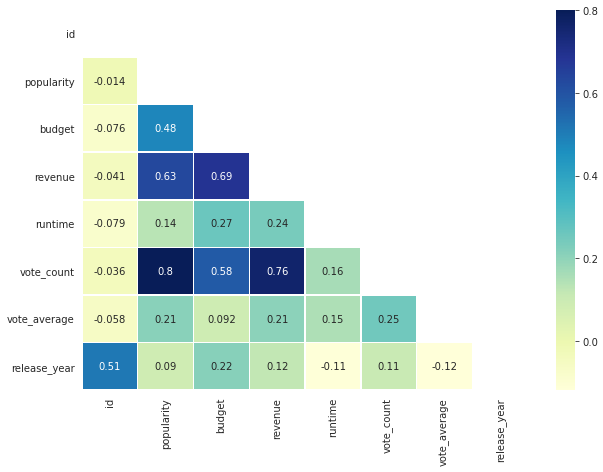

In [608]:
correlation = required_df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(correlation, mask=mask,linewidths = 0.5, annot = True, cmap="YlGnBu")


### Budget

Consider Budget,
		 Minimum Value : 1.0
		 Maximum Value : 425000000.0
		 Mean          : 30739575.95
		 Median        : 17000000.0
		 Std. Deviation: 38904413.82


[Text(0, 0.5, 'Count')]

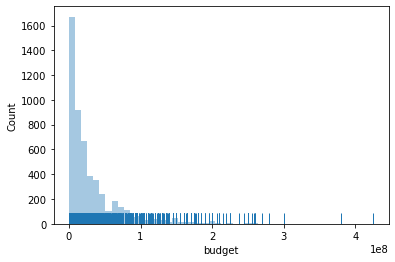

In [537]:
budget = required_df["budget"]
y_label = "Count"
print("Consider Budget,")
print("\t\t Minimum Value :",budget.min())
print("\t\t Maximum Value :",budget.max())
print("\t\t Mean          :",round(budget.mean(),2))
print("\t\t Median        :",budget.median())
print("\t\t Std. Deviation:",round(budget.std(),2))
fig = sns.distplot(budget,kde=False, rug=True);
fig.set(ylabel = y_label)

le8 => 10^8

### Revenue

Consider Budget,
		 Minimum Value : 2.0
		 Maximum Value : 2781505847.0
		 Mean          : 89238858.71
		 Median        : 31853080.0
		 Std. Deviation: 162080146.41


[Text(0, 0.5, 'Count')]

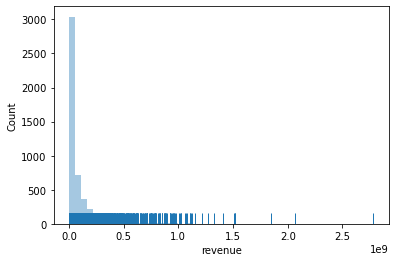

In [538]:
revenue = required_df["revenue"]
y_label = "Count"
print("Consider Budget,")
print("\t\t Minimum Value :",revenue.min())
print("\t\t Maximum Value :",revenue.max())
print("\t\t Mean          :",round(revenue.mean(),2))
print("\t\t Median        :",revenue.median())
print("\t\t Std. Deviation:",round(revenue.std(),2))
fig = sns.distplot(revenue,kde=False, rug=True);
fig.set(ylabel = y_label)

### Popularity 

Consider Popularity,
		 Minimum Value : 6.500000000000001e-05
		 Maximum Value : 32.985763
		 Mean          : 0.65
		 Median        : 0.383831
		 Std. Deviation: 1.0


[Text(0, 0.5, 'Count')]

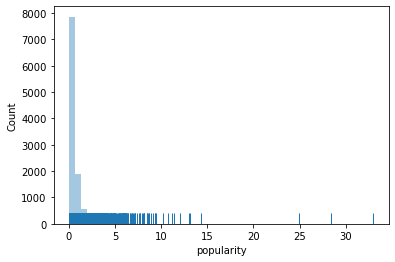

In [539]:
popularity = required_df["popularity"]
y_label = "Count"
print("Consider Popularity,")
print("\t\t Minimum Value :",popularity.min())
print("\t\t Maximum Value :",popularity.max())
print("\t\t Mean          :",round(popularity.mean(),2))
print("\t\t Median        :",popularity.median())
print("\t\t Std. Deviation:",round(popularity.std(),2))
fig = sns.distplot(popularity,kde=False, rug=True);
fig.set(ylabel = y_label)

### Release Year

Consider Budget,
		 Minimum Value : 1960
		 Maximum Value : 2015
		 Mean          : 2001.32
		 Median        : 2006.0
		 Std. Deviation: 12.81


[Text(0, 0.5, 'Count')]

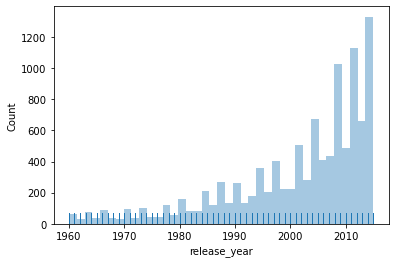

In [540]:
release_year = required_df["release_year"]
y_label = "Count"
print("Consider Budget,")
print("\t\t Minimum Value :",release_year.min())
print("\t\t Maximum Value :",release_year.max())
print("\t\t Mean          :",round(release_year.mean(),2))
print("\t\t Median        :",release_year.median())
print("\t\t Std. Deviation:",round(release_year.std(),2))
fig = sns.distplot(release_year,kde=False, rug=True);
fig.set(ylabel = y_label)

### We can observe an increase in the number of movies released each year with time. Let's understand it's relation with popularity.

Text(0, 0.5, 'Popularity')

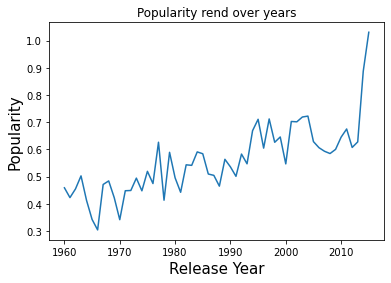

In [541]:
year_pop = required_df.groupby('release_year')['popularity'].mean()
year_pop.plot(title='Popularity rend over years')
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('Popularity',fontsize=15)


### Comparing the last two graphs, we can observe a directly proportional relation between populatrity and the number of movies released in a particular year. 

***

In [542]:
def cut_level(column_name):
    min_value=required_df[column_name].min()
    first_quantile=required_df[column_name].quantile(0.25)
    second_quantile=required_df[column_name].quantile(0.5)
    third_quantile=required_df[column_name].quantile(0.75)
    max_value=required_df[column_name].max()
    bin_edges=[min_value, first_quantile, second_quantile, third_quantile, max_value]
    bin_names=['low','medium','high','sky-high']
    return pd.cut(required_df[column_name], bin_edges, labels = bin_names)    

## Analysing the relation between Popularity & Budget

In [543]:
required_df['binned_budget']= cut_level('budget')
required_df['binned_budget']

0        sky-high
1        sky-high
2        sky-high
3        sky-high
4        sky-high
           ...   
10861         NaN
10862         NaN
10863         NaN
10864         NaN
10865         low
Name: binned_budget, Length: 10865, dtype: category
Categories (4, object): [low < medium < high < sky-high]

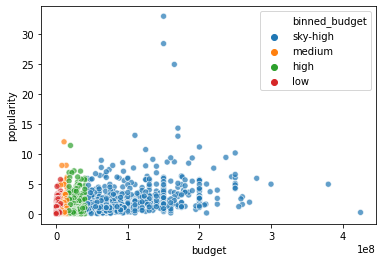

In [544]:
sns.scatterplot(budget,popularity,data = required_df, hue = 'binned_budget', alpha = 0.7)

As we can see, moives with high budget tend to be more popular. There are few exceptions as well.


## Analysing the relation between Popularity & Revenue

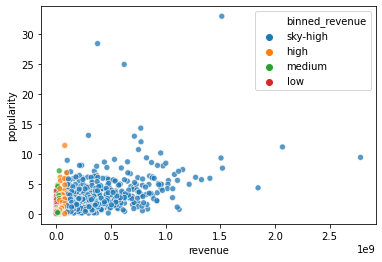

In [545]:
required_df['binned_revenue']= cut_level('revenue')
sns.scatterplot(revenue,popularity,data = required_df, alpha = 0.75,hue = 'binned_revenue')

Movies that have generate immense amount of revenue have been popular too. (obviously)

## Analysing the relation between Budget & Revenue

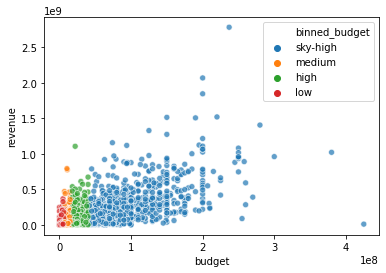

In [546]:
sns.scatterplot(budget,revenue,data = required_df, hue = 'binned_budget', alpha = 0.7)

Nothing surprising here as well. More budget => more revenue and popularity

## Analysing the relation between Vote Average & Popularity

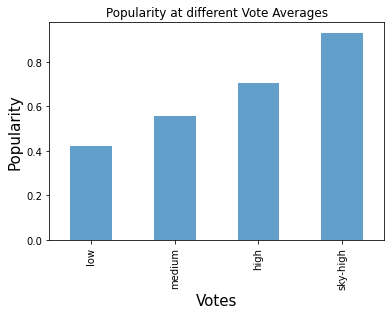

In [547]:
required_df['binned_vote']= cut_level('vote_average')
vote_popu = required_df.groupby('binned_vote')['popularity'].mean()
vote_popu.plot(kind='bar',alpha=0.7)
plt.xlabel('Votes',fontsize=15)
plt.ylabel('Popularity',fontsize=15)
plt.title('Popularity at different Vote Averages')
plt.show()

As the average no. of votes increases, the popularity increases.

## Analysing the trend of average runtime over the years

101.93366093366093

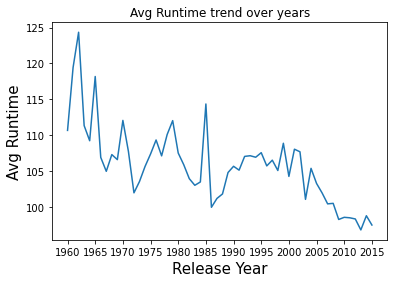

In [641]:
inf = required_df.groupby('release_year')['runtime'].mean()
inf.plot(title='Avg Runtime trend over years',xticks = np.arange(1960,2016,5))
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('Avg Runtime',fontsize=15)
inf[2006]

## Movies with the third highest and third lowest budget

In [610]:
info = pd.DataFrame(required_df['budget'].sort_values(ascending = False))
info['original_title'] = required_df['original_title']
print('Third hightest budget :',info.iloc[2])
info2 = pd.DataFrame(required_df['budget'].sort_values(ascending = True))
info2['original_title'] = required_df['original_title']
print('Third lowest budget:',info2.iloc[2])

Third hightest budget : budget                                               3e+08
original_title    Pirates of the Caribbean: At World's End
Name: 7387, dtype: object
Third lowest budget: budget                      1
original_title    Fear Clinic
Name: 1151, dtype: object


## Movie with the  highest and lowest revenue

In [611]:
minb = required_df["revenue"].idxmin()
maxb = required_df["revenue"].idxmax()
print("Movie with highest revenue:", required_df["original_title"][maxb])
print("Movie with lowest revenue:", required_df["original_title"][minb])

Movie with highest revenue: Avatar
Movie with lowest revenue: Shattered Glass


## Productions companies that have invested in movies with worst revenue

In [612]:
info3 = pd.DataFrame(required_df['revenue'].sort_values(ascending = True))
info3['production_companies'] = required_df['production_companies']
info3['orignal_title'] = required_df['original_title']
info3["production_companies"]

5067              Lions Gate Films
8142             Gramercy Pictures
1380            Universal Pictures
10607    Metro-Goldwyn-Mayer (MGM)
3239                           NaN
                   ...            
10861            Bruce Brown Films
10862         Cherokee Productions
10863                      Mosfilm
10864      Benedict Pictures Corp.
10865                    Norm-Iris
Name: production_companies, Length: 10865, dtype: object

## Average Number of Words in Movie Titles vs Release Date

2.88050784167289

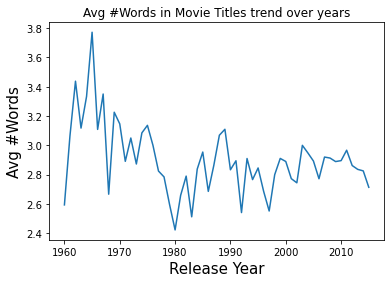

In [645]:
required_df["count"] = required_df['original_title'].str.split().apply(len)
year_count = required_df.groupby('release_year')['count'].mean()
year_count.plot(title='Avg #Words in Movie Titles trend over years')
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('Avg #Words',fontsize=15)
y = required_df[(required_df["release_date"]>="2000") & (required_df["release_date"]<="2005")]
y["count"].mean()